In [6]:
#Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [7]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

## Import the data and Exploration

In [8]:
#Import the csv file
customer_data=pd.read_csv('ACME-HappinessSurvey2020.csv')
customer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [1406]:
customer_data.shape

(126, 7)

In [1577]:
#General view of the data
customer_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [1578]:
#Looking for null values
customer_data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [1579]:
customer_data.duplicated().any()

True

In [1774]:
customer_data[customer_data.duplicated()]

,Y,X1,X2,X3,X4,X5,X6,noise
4,0,5,4,3,3,3,5,0
22,0,4,3,5,5,5,4,0
28,1,3,3,1,3,3,4,0
33,1,3,2,4,4,4,5,0
37,1,5,3,4,3,4,5,0
50,1,5,1,3,3,4,4,0
51,1,5,1,3,3,4,4,0
53,1,5,2,4,3,4,5,0
55,1,4,3,2,4,3,4,0
62,1,5,2,4,4,5,5,0


In [1782]:
(customer_data['Y']==0) & (customer_data['X1']==5) & (customer_data['X2']==4) & (customer_data['X3']==3) & (customer_data['X4']==3) & (customer_data['X5']==3) & (customer_data['X6']==5)

0      False
1      False
2      False
3       True
4       True
       ...  
121    False
122    False
123    False
124    False
125    False
Length: 126, dtype: bool

In [1783]:
customer_data[(customer_data['Y']==0) & (customer_data['X1']==5) & (customer_data['X2']==4) & (customer_data['X3']==3) & (customer_data['X4']==3) & (customer_data['X5']==3) & (customer_data['X6']==5)]

,Y,X1,X2,X3,X4,X5,X6,noise
3,0,5,4,3,3,3,5,0
4,0,5,4,3,3,3,5,0


In [1580]:
new_customer_data=customer_data.drop_duplicates()
new_customer_data.shape

(110, 7)

In [1581]:
#Exploring correlations
customer_data.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [1582]:
new_customer_data.Y.value_counts()

1    56
0    54
Name: Y, dtype: int64

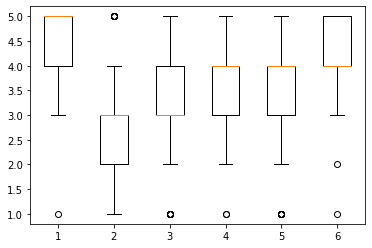

In [1800]:
plt.boxplot(X)
plt.show()


<b> There are some outliers, but that is to be expected in questionnaires with a limited range of values <b> 

## Split the data

In [1789]:
X=customer_data.drop(columns=['Y'],axis=1)
y=customer_data['Y']

In [1799]:
y.value_counts()

1    69
0    57
Name: Y, dtype: int64

## Train the model

### Training a Logistic Regression

In [1642]:
# Create LeaveOneOut for cross validation

cv = LeaveOneOut()

In [1643]:
log_reg=LogisticRegression()

In [1644]:
#Mean score
scores = cross_val_score(log_reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
avg_score =np.mean(scores)
avg_score

0.5396825396825397

In [1648]:
# Standard deviation
np.std(scores)

0.49842280851135184

###  Training a SVC model

In [1600]:
svc=SVC(kernel='linear')

In [1649]:
svc_scores = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svc_avg_score =np.mean(svc_scores)
svc_avg_score

0.5555555555555556

In [1651]:
# Standard deviation of SVC scores
np.std(svc_scores)

0.4969039949999533

### Training an Ada Boost Classifier

In [1605]:
ada_boost=AdaBoostClassifier(learning_rate=0.01)

In [1652]:
ada_scores = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
ada_avg_score =np.mean(ada_scores)
ada_avg_score

0.6507936507936508

In [1653]:
# Standard deviation of AdaBoost scores
np.std(svc_scores)

0.4969039949999533

### Naive Bayes

In [1611]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()


In [1654]:
nb_scores = cross_val_score(naive, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
nb_avg_score =np.mean(nb_scores)
nb_avg_score

0.5555555555555556

In [1655]:
# Standard deviation of SVC scores
np.std(nb_scores)

0.4969039949999533

<b> Ada Boost using a learning rate of 0.01 is the one that provides better score, but not close to the requested target of 73% <b>

## Pre process the data

In [1790]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler=StandardScaler()

In [1791]:
#Scale using MinMax
scaled_X= scaler.fit_transform(X)
scaled_X_df=pd.DataFrame(scaled_X,columns=X.columns)
scaled_X_df.head()

,X1,X2,X3,X4,X5,X6
0,-1.67332,0.421676,-0.303642,0.291150,-1.444166,-0.315061
1,-1.67332,-0.478852,-0.303642,1.437552,0.305497,-1.555612
2,0.83666,0.421676,-0.303642,-0.855253,-0.569335,0.925491
3,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491
4,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491


## Train on scaled data

In [1435]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df, y, test_size=0.2, random_state=42)

In [1616]:
scaled_X_df.shape

(126, 6)

In [1792]:
ada_preproc=AdaBoostClassifier(learning_rate=0.01)


In [1793]:
ada_scores_preproc = cross_val_score(ada_preproc, scaled_X_df, y, scoring='accuracy', cv=cv, n_jobs=-1)
ada_pre_avg_score =np.mean(ada_scores_preproc)
ada_pre_avg_score

0.6507936507936508

In [1794]:
np.std(ada_scores_preproc)

0.47671928310099076

<b> Model didn't improve with preprocessing, let's try with tuning <b>

## Find the best model with hyper parameters

In [1359]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [1661]:
#Initialiazing parameters
parameters = {'learning_rate':[0.001,0.01,0.1,1,5,10],'n_estimators':[30,50,70,100,120,150]}

In [1662]:
#Initialiazing scorer
scorer = make_scorer(accuracy_score)

In [1663]:
#Initializing model and grid
learner = AdaBoostClassifier(random_state=42)
grid_obj= GridSearchCV(learner,parameters,scoring=scorer,n_jobs=-1,verbose=0)

In [1664]:
# Fit the data
grid_fit=grid_obj.fit(scaled_X_df,y)

In [1665]:
# Retrieve the best estimator
best_model= grid_fit.best_estimator_
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=30, random_state=42)

In [1795]:
#Score of the best model
ada_scores_best = cross_val_score(best_model, scaled_X_df, y, scoring='accuracy', cv=cv, n_jobs=-1)
ada_best_score =np.mean(ada_scores_best)
ada_best_score

0.6507936507936508

In [1796]:
np.std(ada_scores_best)

0.47671928310099076

<b> Hyper parameters doesn't increase score, but decreases variance! <br>

## Feature importance

### Weights of importance using Ada Boost

In [1797]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(learning_rate=0.1).fit(scaled_X_df,y)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
importances

array([0.24, 0.08, 0.18, 0.22, 0.08, 0.2 ])

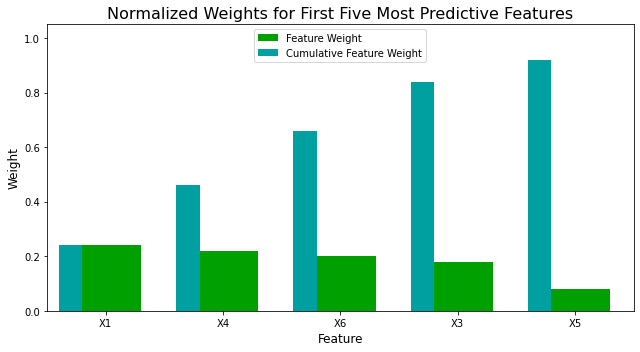

In [1798]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices]
values = importances[indices]

    # Creat the plot
fig = plt.figure(figsize = (9,5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(6), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
plt.bar(np.arange(6) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
plt.xticks(np.arange(6), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()  

<b> Bonus on feature importance <b>


<b> Questions X1, X3, X5 and X6 explain over 80% of the weight in feature importance <b>

## Conclusion and recommendation

### <b> Bottomline, a target of 73% couldn't be reached. Removing features will only decrease the score.  <b>

### Score will increase as we have more data available

## Supplemental

In [1674]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1675]:
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_X_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X_df.values, i) for i in range(len(scaled_X_df.columns))]

In [1676]:
vif_data

,feature,VIF
0,X1,20.696149
1,X2,2.967404
2,X3,7.807500
3,X4,11.154815
4,X5,8.978936
5,X6,19.039965


In [1006]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [1677]:
results=cross_validate(KNeighborsClassifier(),scaled_X_df,y,return_train_score=True)

In [1678]:
kn_scores_best = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
kn_best_score =np.mean(kn_scores_best)
kn_best_score

0.49206349206349204

In [1537]:
results['train_score'].mean()

0.7182178217821782

In [1538]:
results['test_score'].mean()

0.5323076923076923

In [1539]:
from sklearn.linear_model import RidgeClassifier

In [1679]:
ridge_scores_best = cross_val_score(RidgeClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
ridge_best_score =np.mean(ridge_scores_best)
ridge_best_score

0.5396825396825397

In [1541]:
results['train_score'].mean()

0.6130495049504951

In [1542]:
results['test_score'].mean()

0.564

In [1121]:
customer_data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [1142]:
boolean=(customer_data['X6']>=4) & (customer_data['X1']>=4) & (customer_data['X5']>=4) & (customer_data['Y']==0)

<AxesSubplot:xlabel='X6', ylabel='Count'>

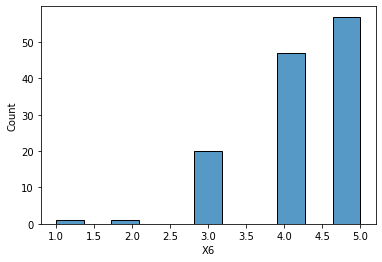

In [1543]:
sns.histplot(customer_data['X6'])

In [1680]:
from sklearn.ensemble import IsolationForest

In [1681]:
forest=IsolationForest()

In [1682]:
metrics_df

,X1,X2,X3,X4,X5,X6,anomaly
0,3,3,3,4,2,4,1
1,3,2,3,5,4,3,1
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,1
4,5,4,3,3,3,5,1
...,...,...,...,...,...,...,...
121,5,2,3,4,4,3,1
122,5,2,3,4,2,5,1
123,5,3,3,4,4,5,1
124,4,3,3,4,4,5,1


In [1683]:
metrics_df=customer_data.drop('Y',axis=1)

In [1684]:
metrics_df.columns
#specify the 12 metrics column names to be modelled
to_model_columns=metrics_df.columns
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.04), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(metrics_df[to_model_columns])
pred = clf.predict(metrics_df[to_model_columns])
metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(metrics_df['anomaly'].value_counts())

 1    121
-1      5
Name: anomaly, dtype: int64


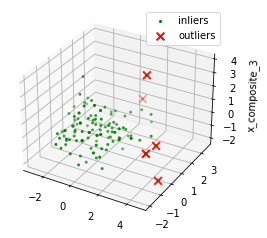

In [1685]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(metrics_df[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()


In [1686]:
from sklearn.cluster import DBSCAN

In [1701]:
scan=DBSCAN(eps=2,min_samples=2).fit(X)

In [1702]:
scan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0])

In [1703]:
scan.get_params

<bound method BaseEstimator.get_params of DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)>

In [1704]:
aux_data=customer_data
aux_data

,Y,X1,X2,X3,X4,X5,X6,noise
0,0,3,3,3,4,2,4,0
1,0,3,2,3,5,4,3,0
2,1,5,3,3,3,3,5,0
3,0,5,4,3,3,3,5,0
4,0,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3,0
122,1,5,2,3,4,2,5,0
123,1,5,3,3,4,4,5,0
124,0,4,3,3,4,4,5,0


In [1705]:
aux_data['noise']=scan.labels_

In [1706]:
aux_data[aux_data['noise']==-1]

,Y,X1,X2,X3,X4,X5,X6,noise
34,1,4,1,3,1,1,4,-1
47,0,1,1,1,3,1,4,-1
67,0,4,1,1,3,4,4,-1
119,1,5,5,1,1,5,1,-1


In [1769]:
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=10)

In [1770]:
cross_val_score(svc,X,y,cv=skfold).mean()

0.5576923076923077

In [1771]:
cross_val_score(log_reg,X,y,cv=skfold).mean()

0.5416666666666667

In [1772]:
cross_val_score(best_model,scaled_X_df,y,cv=skfold).mean()

0.6519230769230769

In [1752]:
from sklearn.model_selection import ShuffleSplit


ssplit=ShuffleSplit(n_splits=10,test_size=0.25)

In [1759]:
cross_val_score(log_reg,X,y,cv=ssplit).mean()

0.6

In [1764]:
cross_val_score(ada_boost,X,y,cv=ssplit).mean()

0.5875

In [1763]:
cross_val_score(ada_boost,new_customer_data.drop('Y',axis=1),new_customer_data['Y'],cv=ssplit).mean()

0.6178571428571429

In [1802]:
cross_val_score(svc,X,y,cv=ssplit).mean()

0.565625

In [4]:
from sklearn.mixture import GaussianMixture

In [1805]:
gaussian= GaussianMixture()

In [1810]:
cv

LeaveOneOut()

In [1820]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [1824]:
cross_val_score(tree,X,y,cv=cv).mean()

0.5396825396825397

In [1828]:
from sklearn.ensemble import RandomForestClassifier
random_f=RandomForestClassifier(max_depth=3)

In [1831]:
cross_val_score(random_f,X,y,cv=cv).mean()

0.5476190476190477